
# Neural Networks with Python - Customer Churn dataset
#### In this jupyter notebook, I'm trying to predict which customers will leave the bank using neural network 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [5]:
data.columns.tolist()

['CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [6]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.info

<bound method DataFrame.info of       CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  Estimate

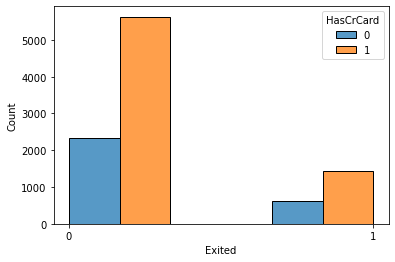

In [8]:
sns.histplot(data = data, x = 'Exited', hue = 'HasCrCard', multiple='dodge', bins = 3);
plt.xticks(ticks=[0, 1]);


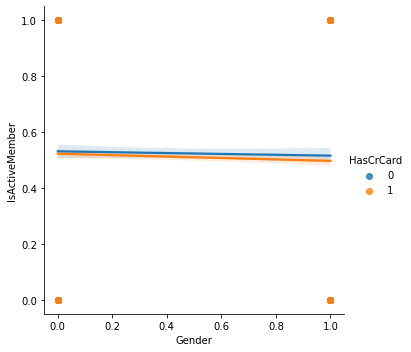

In [9]:
data['Gender']=np.where(data['Gender']=='Female',1,0) 

sns.lmplot(data=data, x='Gender', y='IsActiveMember', hue='HasCrCard');

In [10]:

data['Male'] = data['Surname'].apply(lambda x: 1 if x == 'Male' else 0)
data['Germany'] = data['Geography'].apply(lambda x: 1 if x == 'Germany' else 0)
data['Spain'] = data['Geography'].apply(lambda x: 1 if x == 'Spain' else 0)

cols = ['Male', 'Germany', 'Spain'] + [col for col in data.columns if col not in ['Male', 'Germany', 'Spain']]
data = data.reindex(columns=cols)

data.head()


,Male,Germany,Spain,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data.drop(columns=['CustomerId','Surname','Geography','Gender'], inplace=True)

In [12]:
X = data.drop('Exited', axis = 1)
y = data['Exited']

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Creation

In [16]:

from keras.models import Sequential
from keras.layers import Dense


In [17]:

classifier = Sequential()


In [18]:
classifier.add(Dense(input_dim = 11, units = 6, activation = 'relu'))


In [19]:
classifier.add(Dense(units = 6, activation = 'relu'))

In [20]:
classifier.add(Dense(units = 1, activation = "sigmoid"))

In [21]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [22]:
classifier.fit(X_train, y_train, epochs = 50, batch_size=10)


Epoch 1/50
800/800 [==============================] - 6s 3ms/step - loss: 0.4867 - accuracy: 0.7960
Epoch 2/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4460 - accuracy: 0.7968
Epoch 3/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4300 - accuracy: 0.8102
Epoch 4/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4169 - accuracy: 0.8188
Epoch 5/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4041 - accuracy: 0.8232
Epoch 6/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3929 - accuracy: 0.8335
Epoch 7/50
800/800 [==============================] - 2s 3ms/step - loss: 0.3839 - accuracy: 0.8385
Epoch 8/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3764 - accuracy: 0.8424
Epoch 9/50
800/800 [==============================] - 2s 3ms/step - loss: 0.3701 - accuracy: 0.8453
Epoch 10/50
800/800 [==============================] - 2s 3ms/step - loss: 0.3649 - accuracy: 0.8470

In [23]:
y_pred = classifier.predict(X_test)

63/63 [==============================] - 1s 4ms/step


In [24]:
y_predict = (y_pred > 0.5) # Set the probability parameter of a customer with higher than 0.5


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)


array([[1542,   53],
       [ 218,  187]], dtype=int64)

In [26]:

from sklearn.metrics import classification_report

report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1595
           1       0.78      0.46      0.58       405

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

